In [ ]:
import pandas as pd
import numpy as np

how to implement the stock prediction model using neural networks step by step practically. We will start with a detailed explanation of neural networks, including the essential components (layers, activations, feedforward, and backpropagation) and transition to deep learning. We then move on to implementations from scratch with scikit-learn and TensorFlow. The ways to avoid overfitting, such as dropout and early stopping. Finally, you will apply what we covered previously to solve our stock price prediction problem.

In [ ]:
def sigmoid(z):
    return 1.0/(1+ np.exp(-z))
def sigmoid_derivative(z):
    return sigmoid(z) * (1.0-sigmoid(z))

In [ ]:
def train(X, y, n_hidden, learning_rate, n_iter):
    m, n_input = X.shape
    W1=np.random.randn(n_input, n_hidden)
    b1=np.zeros((1, n_hidden))
    W2=np.random.randn(n_hidden, 1)
    b2=np.zeros((1,1))
    for i in range(1, n_iter+1):
        Z2=np.matmul(X,W1) + b1
        A2=sigmoid(Z2)
        Z3=np.matmul(A2, W2) + b2
        A3=Z3
        dZ3=A3-y
        dW2=np.matmul(A2.T, dZ3)
        db2=np.sum(dZ3, axis=0, keepdims=True)
        dZ2=np.matmul(dZ3, W2.T) * sigmoid_derivative(Z2)
        dW1=np.matmul(X.T, dZ2)
        db1=np.sum(dZ2, axis=0)
        W2=W2-learning_rate*dW2/m
        b2=b2-learning_rate*db2/m
        W1=W1-learning_rate*dW1/m

        b1=b1-learning_rate*db1/m
        if i % 100==0:
            cost=np.mean((y-A3)**2)
            print('Iteration %i, training loss: %f' % (i,cost))
    model={'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
    return model

In [ ]:
from sklearn import datasets
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]
#boston=datasets.load_boston()
num_test=10 #the last 10 samples as testing set
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X_train=data[:-num_test, :]
X_train=scaler.fit_transform(X_train)
y_train=target[:-num_test].reshape(-1,1)
X_test=data[-num_test:, :]
X_test=scaler.transform(X_test)
y_test=target[-num_test:]

In [ ]:
n_hidden=20
learning_rate=0.1
n_iter=2000
model=train(X_train,y_train,n_hidden,learning_rate,n_iter)

Iteration 100, training loss: 12.300093
Iteration 200, training loss: 8.685077
Iteration 300, training loss: 7.463284
Iteration 400, training loss: 6.771094
Iteration 500, training loss: 6.211099
Iteration 600, training loss: 5.776562
Iteration 700, training loss: 5.398643
Iteration 800, training loss: 5.109906
Iteration 900, training loss: 4.859596
Iteration 1000, training loss: 4.630014
Iteration 1100, training loss: 4.418704
Iteration 1200, training loss: 4.231236
Iteration 1300, training loss: 4.067245
Iteration 1400, training loss: 3.921186
Iteration 1500, training loss: 3.787546
Iteration 1600, training loss: 3.662822
Iteration 1700, training loss: 3.546226
Iteration 1800, training loss: 3.436772
Iteration 1900, training loss: 3.328227
Iteration 2000, training loss: 3.230002


In [ ]:
def predict(x, model):
    W1=model['W1']
    b1=model['b1']
    W2=model['W2']
    b2=model['b2']
    A2=sigmoid(np.matmul(x,W1)+b1)
    A3=np.matmul(A2, W2)+b2
    return A3

In [ ]:
predictions=predict(X_test, model)

In [ ]:
print(predictions)

[[17.92227214]
 [18.84809464]
 [20.53148989]
 [18.43197427]
 [19.7850541 ]
 [22.35583015]
 [20.72281855]
 [28.41174004]
 [25.96755263]
 [20.7422927 ]]


In [ ]:
print(y_test)

[19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


### 2. scikit-learn Implementation

In [ ]:
from sklearn.neural_network import MLPRegressor
nn_scikit=MLPRegressor(hidden_layer_sizes=(16,8), activation='relu', solver='adam',
                       learning_rate_init=0.001, random_state=42, max_iter=2000)

In [ ]:
nn_scikit.fit(X_train, y_train)
predictions =nn_scikit.predict(X_test)
print(predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16.79582331 18.55538023 21.07961496 19.21362606 18.50955771 23.5608387
 22.27916529 27.11909153 24.70251262 22.05522035]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(np.mean((y_test-predictions)**2))

13.933482332708795


Tensor Flow Implementation

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [ ]:
model=keras.Sequential([keras.layers.Dense(units=20, activation='relu'), keras.layers.Dense(units=8, activation='relu'),keras.layers.Dense(units=1)])

In [ ]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.02))

In [ ]:
model.fit(X_train,y_train, epochs=300)

Epoch 1/300
16/16 [==============================] - 1s 1ms/step - loss: 433.3733
Epoch 2/300
16/16 [==============================] - 0s 1ms/step - loss: 80.1758
Epoch 3/300
16/16 [==============================] - 0s 1ms/step - loss: 28.8860
Epoch 4/300
16/16 [==============================] - 0s 1ms/step - loss: 22.7008
Epoch 5/300
16/16 [==============================] - 0s 1ms/step - loss: 18.7512
Epoch 6/300
16/16 [==============================] - 0s 1ms/step - loss: 16.3690
Epoch 7/300
16/16 [==============================] - 0s 1ms/step - loss: 14.0681
Epoch 8/300
16/16 [==============================] - 0s 1ms/step - loss: 14.5999
Epoch 9/300
16/16 [==============================] - 0s 1ms/step - loss: 12.4302
Epoch 10/300
16/16 [==============================] - 0s 1ms/step - loss: 11.4262
Epoch 11/300
16/16 [==============================] - 0s 1ms/step - loss: 11.0961
Epoch 12/300
16/16 [==============================] - 0s 1ms/step - loss: 11.1060
Epoch 13/300
16/16 [====

In [ ]:
predictions_2=model.predict(X_test)[:,0]
print(predictions_2)

1/1 [==============================] - 0s 44ms/step
[14.374293 20.34782  22.487867 19.427124 19.157806 26.405304 21.395239
 30.346127 27.383427 19.784338]


In [ ]:
print(np.mean((y_test-predictions_2)**2))

19.28598603534936


Handling Overfitting

In [ ]:
model=keras.Sequential([keras.layers.Dense(units=32, activation='relu'), tf.keras.layers.Dropout(0.5),keras.layers.Dense(units=1)])

Stock Prices Prediction using Neural Networks

In [ ]:
mydata=pd.read_csv(r"20051201_20051210.csv",index_col='Date')
mydata

,Open,High,Low,Close,Volume
Date,,,,,
2005-12-01,10806.0,10934.9,10806.0,10912.6,256932865
2005-12-02,10912.0,10921.4,10861.7,10877.5,214888854
2005-12-05,10877.0,10877.0,10810.7,10835.0,237430947
2005-12-06,10835.4,10936.2,10835.4,10856.9,264721465
2005-12-07,10856.9,10868.1,10764.0,10810.9,243543206
2005-12-08,10808.4,10847.2,10729.7,10755.1,253313750
2005-12-09,10751.8,10806.0,10729.9,10778.6,238907145


In [ ]:
#implement feature generation by starting with a sub-function that directly creates features from the original six features
def add_original_feature(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)

In [ ]:
#develop a sub-function that generates six features related to average close prices
def add_avg_price(df, df_new):
    df_new['avg_price_5']=df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30']=df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365']=df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30']=df_new['avg_price_5']/df_new['avg_price_30']
    df_new['ratio_avg_price_5_365']=df_new['avg_price_5']/df_new['avg_price_365']
    df_new['ratio_avg_price_30_365']=df_new['avg_price_30']/df_new['avg_price_365']

In [ ]:
#a sub-function that generates six features related to average volumes is as follows
def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] =df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] =df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30']=df_new['avg_volume_5']/df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365']=df_new['avg_volume_5']/df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365']=df_new['avg_volume_30']/df_new['avg_volume_365']


In [ ]:
#for the standard deviation, we develop the following sub-function for the price related features
def add_std_price(df, df_new):
    df_new['std_price_5'] =df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] =df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] =df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] =df_new['std_price_5']/df_new['std_price_30']
    df_new['ratio_std_price_5_365']=df_new['std_price_5']/df_new['std_price_365']
    df_new['ratio_std_price_30_365']=df_new['std_price_30']/df_new['std_price_365']

In [ ]:
#Similarly, a sub-function that generates six volume-based standard deviation features is as follows.
def add_std_volume(df, df_new):
    df_new['std_volume_5']=df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30']=df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] =df['Volume'].rolling(252).std().shift (1)
    df_new['ratio_std_volume_5_30']=df_new['std_volume_5']/df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] =df_new['std_volume_5']/df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] =df_new['std_volume_30']/df_new['std_volume_365']

In [ ]:
#Seven return-based features are generated using the following sub-function.
def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1))/df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5))/df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] -df['Close'].shift(21))/df['Close'].shift (21)).shift(1)
    df_new['return_365'] = ((df['Close'] -df['Close'].shift(252))/df['Close'].shift (252)).shift(1)
    df_new['moving_avg_5'] =df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] =df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] =df_new['return_1'].rolling(252).mean().shift(1)

In [ ]:
#Finally, we put together the main feature generation function that calls all the preceding sub-functions.
def generate_features(df):

    df_new=pd.DataFrame()
    # 6 original features
    add_original_feature(df, df_new)
    # 31 generated features
    add_avg_price(df,df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df,df_new)
    add_return_feature(df,df_new)
    #the target
    df_new['close']=df['Close']
    df_new=df_new.dropna(axis=0)
    return df_new

In [ ]:
data_raw=pd.read_csv(r"19880101_20191231.csv", index_col='Date')
data=generate_features(data_raw)

In [ ]:
print(data.round(decimals=3).head(5))

              open  open_1  close_1  high_1   low_1    volume_1  avg_price_5  \
Date                                                                           
1989-01-04  2146.6  2168.4   2144.6  2168.4  2127.1  17302883.0      2165.00   
1989-01-05  2177.7  2146.6   2177.7  2183.4  2146.6  15714720.0      2168.00   
1989-01-06  2190.5  2177.7   2190.5  2205.2  2173.0  20303094.0      2172.82   
1989-01-09  2194.3  2190.5   2194.3  2213.8  2182.3  16494441.0      2175.14   
1989-01-10  2199.5  2194.3   2199.5  2209.1  2185.0  18410324.0      2181.32   

            avg_price_30  avg_price_365  ratio_avg_price_5_30  ...  \
Date                                                           ...   
1989-01-04      2150.624       2062.113                 1.007  ...   
1989-01-05      2154.690       2062.668                 1.006  ...   
1989-01-06      2157.867       2063.218                 1.007  ...   
1989-01-09      2160.005       2064.341                 1.007  ...   
1989-01-10      216

In [ ]:
#Training a simple neural network.
#We load the stock data, generate features, and label the generate_features function, Predicting Stock Prices with Regression Algorithms:
data_raw=pd.read_csv(r"19880101_20191231.csv", index_col='Date')
data=generate_features(data_raw)

In [ ]:
#We construct the training set using data from 1988 to 2018 and the testing set using data from 2019:
start_train='1988-01-01'
end_train='2018-12-31'
start_test='2019-01-01'
end_test='2019-12-31'
data_train=data.loc[start_train:end_train]
X_train=data_train.drop('close', axis=1).values
y_train=data_train['close'].values
data_test=data.loc[start_test:end_test]
X_test=data_test.drop('close',axis=1).values
y_test=data_test['close'].values

In [ ]:
#We need to normalize features into the same or a comparable scale. We do so by removing the mean and rescaling to unit variance:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
#We rescale both sets with the scaler taught by the training set:
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [ ]:
#We now build a neural network model using the Keras Sequential API:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([Dense(units=32, activation='relu'), Dense(units=1)])

In [ ]:
#And we compile the model by using Adam as the optimizer with a learning rate of 0.1 and MSE as the learning goal:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
#After defining the model, we now train it against the training set:
model.fit(X_scaled_train, y_train, epochs=100, verbose=True)

Epoch 1/100
237/237 [==============================] - 1s 1ms/step - loss: 33025302.0000
Epoch 2/100
237/237 [==============================] - 0s 1ms/step - loss: 2049651.7500
Epoch 3/100
237/237 [==============================] - 0s 1ms/step - loss: 514644.3125
Epoch 4/100
237/237 [==============================] - 0s 987us/step - loss: 179688.3438
Epoch 5/100
237/237 [==============================] - 0s 1ms/step - loss: 86373.3047
Epoch 6/100
237/237 [==============================] - 0s 1ms/step - loss: 50651.1016
Epoch 7/100
237/237 [==============================] - 0s 968us/step - loss: 35019.1992
Epoch 8/100
237/237 [==============================] - 0s 992us/step - loss: 28108.4336
Epoch 9/100
237/237 [==============================] - 0s 990us/step - loss: 26475.5352
Epoch 10/100
237/237 [==============================] - 0s 986us/step - loss: 25541.5371
Epoch 11/100
237/237 [==============================] - 0s 913us/step - loss: 29194.7422
Epoch 12/100
237/237 [===========

In [ ]:
predictions_3=model.predict(X_scaled_test)
print(predictions_3)

8/8 [==============================] - 0s 1ms/step
[[23568.459]
 [23581.818]
 [23084.455]
 [23764.826]
 [23868.143]
 [24108.541]
 [24148.73 ]
 [24271.074]
 [24262.178]
 [24219.229]
 [24404.273]
 [24519.432]
 [24725.88 ]
 [24980.195]
 [24748.115]
 [24913.977]
 [24897.414]
 [25015.229]
 [24777.197]
 [24970.834]
 [25306.322]
 [25220.104]
 [25344.215]
 [25506.566]
 [25686.033]
 [25628.234]
 [25446.389]
 [25431.162]
 [25455.63 ]
 [25801.53 ]
 [25891.223]
 [25812.998]
 [26221.51 ]
 [26252.818]
 [26301.613]
 [26226.363]
 [26434.59 ]
 [26491.94 ]
 [26417.662]
 [26350.385]
 [26307.666]
 [26429.732]
 [26193.303]
 [26183.068]
 [26060.373]
 [25819.814]
 [25718.654]
 [25922.754]
 [25937.346]
 [26057.467]
 [26072.217]
 [26053.018]
 [26200.684]
 [26192.643]
 [26013.494]
 [26175.97 ]
 [25897.889]
 [25957.127]
 [26091.809]
 [26053.115]
 [26101.896]
 [26382.764]
 [26695.996]
 [26624.033]
 [26657.375]
 [26799.13 ]
 [26803.264]
 [26685.123]
 [26567.418]
 [26612.121]
 [26639.717]
 [26785.547]
 [26768.498]


In [ ]:
#Finally, we use the trained model to predict the testing data and display metrics:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'MSE: {mean_squared_error(y_test,predictions_3):.3f}')

MSE: 172203.301


In [ ]:
print(f'MAE: {mean_absolute_error(y_test,predictions_3):.3f}')

MAE: 370.499


In [ ]:
print(f'R^2: {r2_score(y_test, predictions_3):.3f}')

R^2: 0.852


In [ ]:
from tensorboard.plugins.hparams import api as hp

In [ ]:
HP_HIDDEN = hp.HParam('hidden_size', hp.Discrete([64, 32,16]))
HP_EPOCHS = hp.HParam('epochs', hp.Discrete([300, 1000]))
HP_LEARNING_RATE= hp.HParam('learning_rate', hp.RealInterval (0.01, 0.4))

In [ ]:
def train_test_model(hparams, logdir):

    model = Sequential([Dense(units=hparams[HP_HIDDEN], activation='relu'),Dense(units=1)])

    model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(hparams[HP_LEARNING_RATE]),metrics=['mean_squared_error'])

    model.fit(X_scaled_train, y_train,validation_data=(X_scaled_test, y_test), epochs=hparams [HP_EPOCHS], verbose=False, callbacks=[tf.keras.callbacks. TensorBoard (logdir), hp.KerasCallback(logdir, hparams), tf.keras.callbacks. EarlyStopping( monitor= 'val_loss', min_delta=0, patience=200, verbose=0, mode= 'auto',)],)
    mse=model.evaluate(X_scaled_test, y_test)[1]


    pred = model.predict(X_scaled_test)

    r2 = r2_score (y_test, pred)

    return mse, r2

In [ ]:
def run (hparams, logdir):
    with tf.summary.create_file_writer (logdir).as_default():
        hp.hparams_config(hparams=[HP_HIDDEN, HP_EPOCHS, HP_LEARNING_RATE],
                          metrics=[hp.Metric('mean_squared_error', display_name='mse'),
                                   hp.Metric('r2', display_name='r2')])
        mse, r2 = train_test_model(hparams, logdir)
        tf.summary.scalar('mean_squared_error', mse, step=1)
        tf.summary.scalar('r2', r2, step=1)

In [ ]:
session_num=1
for hidden in HP_HIDDEN.domain.values:
    for epochs in HP_EPOCHS.domain.values:
        for learning_rate in tf.linspace(HP_LEARNING_RATE.domain.min_value, HP_LEARNING_RATE.domain.max_value, 5):
                hparams ={HP_HIDDEN: hidden,HP_EPOCHS: epochs,HP_LEARNING_RATE:float("%.2f"%float (learning_rate)),}

                run_name = "run-%d" % session_num
                print('-- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                run(hparams, 'logs/hparam_tuning/' + run_name)
                session_num+=1

-- Starting trial: run-1
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.01}
8/8 [==============================] - 0s 2ms/step
-- Starting trial: run-2
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.11}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-3
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.21}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-4
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.3}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-5
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.4}
8/8 [==============================] - 0s 2ms/step
-- Starting trial: run-6
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.01}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-7
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.11}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-8
{'hidden_size': 16, 'epochs': 1000, '

After above process, we can get some log files which is saved in our folder.Then we have to open anaconda prompt, in anaconda prompt we have to provide path of log file, then we will get http link,now we have to link in google. There we can observe the results and also we find the best accurate results of our model.
I got 0.96962 of r2 square value and 35261 mse value,when hidden_size is 32.000, epochs=1000 and learning rate=0.4.

In [ ]:
!zip -r logs.zip logs

  adding: logs/ (stored 0%)
  adding: logs/hparam_tuning/ (stored 0%)
  adding: logs/hparam_tuning/run-9/ (stored 0%)
  adding: logs/hparam_tuning/run-9/events.out.tfevents.1687236650.94c8ce8a5f5f.389.176.v2 (deflated 23%)
  adding: logs/hparam_tuning/run-9/events.out.tfevents.1687230652.94c8ce8a5f5f.389.32.v2 (deflated 23%)
  adding: logs/hparam_tuning/run-9/train/ (stored 0%)
  adding: logs/hparam_tuning/run-9/train/events.out.tfevents.1687230652.94c8ce8a5f5f.389.34.v2 (deflated 79%)
  adding: logs/hparam_tuning/run-9/train/events.out.tfevents.1687236650.94c8ce8a5f5f.389.178.v2 (deflated 78%)
  adding: logs/hparam_tuning/run-9/events.out.tfevents.1687230652.94c8ce8a5f5f.389.33.v2 (deflated 20%)
  adding: logs/hparam_tuning/run-9/validation/ (stored 0%)
  adding: logs/hparam_tuning/run-9/validation/events.out.tfevents.1687236651.94c8ce8a5f5f.389.179.v2 (deflated 81%)
  adding: logs/hparam_tuning/run-9/validation/events.out.tfevents.1687230653.94c8ce8a5f5f.389.35.v2 (deflated 81%)
  ad

In [ ]:
from google.colab import files
files.download('logs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#we use the optimal model to make predictions:
model=Sequential([Dense(units=16, activation='relu'), Dense(units=1)])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.21))
model.fit(X_scaled_train, y_train, epochs=1000, verbose=False)
predictions_4= model.predict(X_scaled_test)[:,0]

8/8 [==============================] - 0s 1ms/step


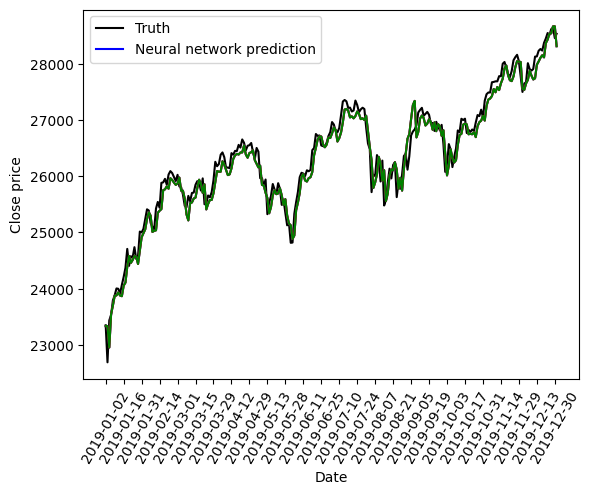

In [ ]:
#Plot the prediction along with the ground truth as follows:
import matplotlib.pyplot as plt
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index,predictions_4,c='b')
plt.plot(data_test.index,predictions_4,c='r')
plt.plot(data_test.index,predictions_4,c='g')
plt.xticks(range(0,252,10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Neural network prediction'])
plt.show()